In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import csv
from scipy import interpolate

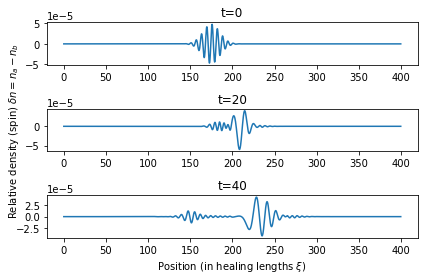

In [87]:
#plotting relative densities of the components in space and time
a=[]
b=[]
dx=0.25
x=np.arange(0,400,dx) #gridspace

with open("results.txt") as results:
    psi_norm=np.loadtxt(results, delimiter=",")

a=np.copy(psi_norm[:,::2])
b=np.copy(psi_norm[:,1::2])

Figure, (ax1, ax2, ax3)=plt.subplots(3)
ax1.plot(x,a[0]-b[0])
ax1.set_title('t=0')
#ax1.set_ylabel('$\delta n=n_a-n_b$')
ax2.plot(x,a[20]-b[20])
ax2.set_title('t=20')
ax2.set_ylabel('Relative density (spin) $\delta n=n_a-n_b$')
ax3.plot(x,a[40]-b[40])
ax3.set_title('t=40')
ax3.set_xlabel(r'Position (in healing lengths $\xi$)')
#ax3.set_ylabel('$\delta n=n_a-n_b$')
ax1.ticklabel_format(axis='y', style='sci', scilimits=[0,0])
Figure.tight_layout()
#plt.suptitle('Free wave propagation', fontsize=14)
plt.show()

Text(-5, 5, 'T2')

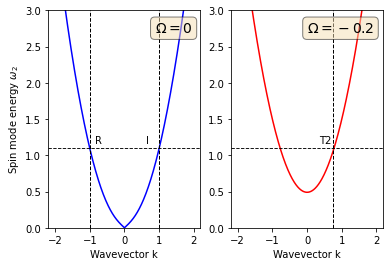

In [110]:
#plotting dimensionless dispersion relation of spectra for density and spin modes
k=np.arange(-2,2,0.01)
w2free=[]
w2=[]
gfraction=0.8
omega=-0.2 #in gn

for x in k:
    temp1=np.sqrt(np.power(x,2)*(np.power(x,2)+1-gfraction))
    w2free.append(temp1)

for x in k:
    temp2=np.sqrt(np.power(x,2)*(np.power(x,2)+1-gfraction+4*np.absolute(omega))+2*np.absolute(omega)*(1-gfraction+2*np.absolute(omega)))
    w2.append(temp2)

#tck=interpolate.splrep(k,w2)
#tangent=interpolate.splev(k,tck,der=1)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

Figure, (ax1, ax2)=plt.subplots(1,2)
ax1.plot(k, w2free, color='blue')
ax1.set_ylim([0,3])
ax1.set_ylabel('Spin mode energy $\omega_2$')
ax1.set_xlabel('Wavevector k')
ax1.axhline(1.1, linestyle='--', linewidth=0.9, color='black', clip_on=False)
ax1.axvline(1, linestyle='--', linewidth=1, color='black', clip_on=False)
ax1.axvline(-1, linestyle='--', linewidth=1, color='black', clip_on=False)
ax1.annotate("I", (0.8, 1.1), textcoords="offset points", xytext=(-6, 5))
ax1.annotate("R", (-1, 1.1), textcoords="offset points", xytext=(5, 5))
ax1.text(0.7, 0.95, '$\Omega=0$', transform=ax1.transAxes, fontsize=14, verticalalignment='top', bbox=props)
ax2.plot(k, w2, color='red')
ax2.set_ylim([0,3])
ax2.set_xlabel('Wavevector k')
ax2.axhline(1.1, linestyle='--', linewidth=0.9, color='black', clip_on=False)
ax2.axvline(0.75, linestyle='--', linewidth=1, color='black', clip_on=False)
ax2.text(0.5, 0.95, '$\Omega=-0.2$', transform=ax2.transAxes, fontsize=14, verticalalignment='top', bbox=props)
ax2.annotate("T2", (0.5, 1.1), textcoords="offset points", xytext=(-5, 5))
#plt.suptitle('Spin mode dispersion relations', fontsize=14)

ValueError: x and y must have same first dimension, but have shapes (20,) and (25,)

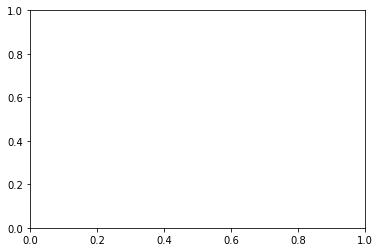

In [ ]:
#finding dw/dk to get an idea of group velocity of spin mode
#idea is to find position of relative density mode peak for each timestep
#then graph position and time and fit the line to find gorup velocity
spinmodes=np.subtract(a,b).tolist()
max_index=[]  #peak position index

for row in spinmodes:
    max_value=max(row)
    max_index.append(row.index(max_value))

max_position=[i*dx for i in max_index]

#plotting peak position in space and time
time=np.arange(0,20,1)
plt.plot(time, max_position)

#finding group velocity
m,b=np.polyfit(time, max_position,1)
print(m)
